In [2]:
%matplotlib inline
import pandas as pd
from IPython.core.display import HTML
css=open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>()</style>'.format(css))
titles=pd.read_csv('titles.csv', index_col=None)
titles.head()

,title,year
0,Tasveer Mere Sanam,1996
1,Only You,1994
2,El pueblo del terror,1970
3,Machine,2007
4,MARy,2008


In [3]:
cast = pd.read_csv('cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


# Using groupby(), plot the number of films that have been released each decade in the history of cinema.

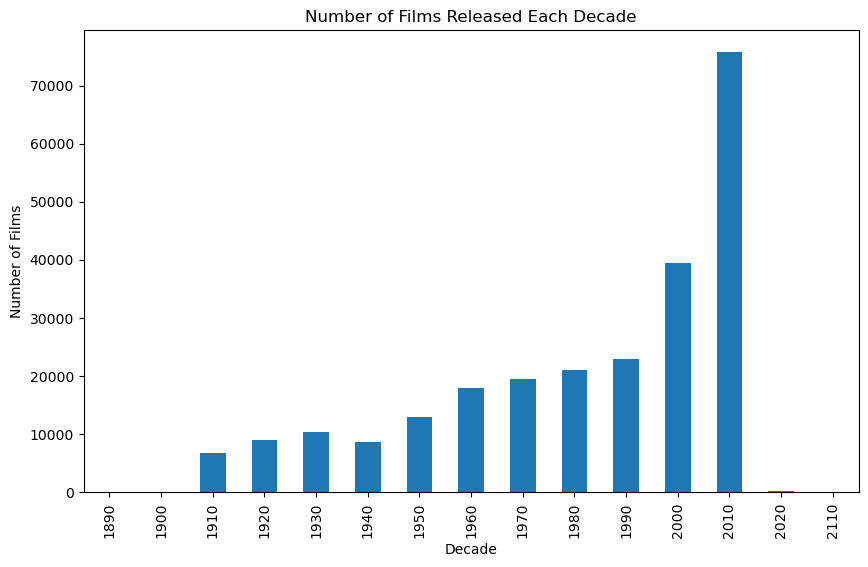

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the 'titles' DataFrame
titles = pd.read_csv('titles.csv', index_col=None)

# Extract the decade from the 'year' column
titles['decade'] = (titles['year'] // 10) * 10

# Group the titles by decade and count the number of films in each decade
film_count_by_decade = titles.groupby('decade').size()

# Plot the results
film_count_by_decade.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Decade')
plt.ylabel('Number of Films')
plt.title('Number of Films Released Each Decade')
plt.show()

# Use groupby() to plot the number of "Hamlet" films made each decade.

C:\Users\Rishabh\AppData\Local\Temp\ipykernel_18324\34000047.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hamlet_films['decade'] = (hamlet_films['year'] // 10) * 10


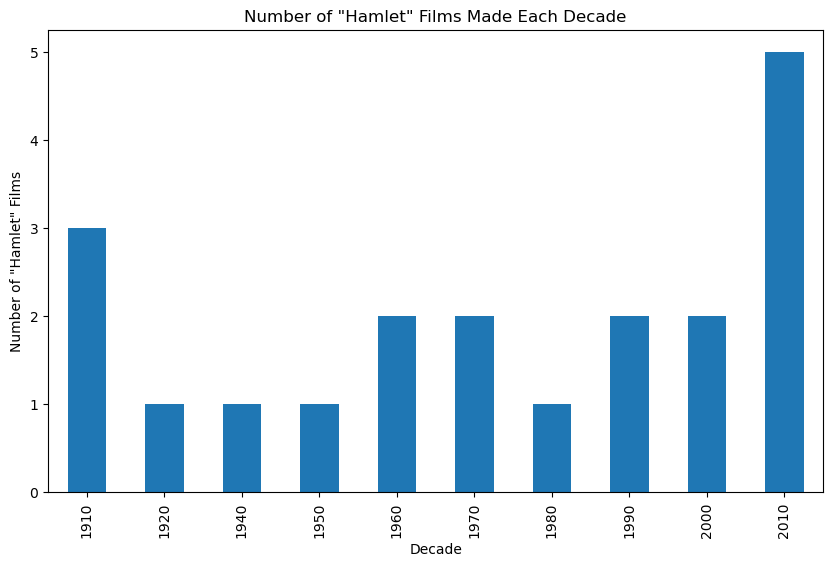

In [5]:
# Filter the 'titles' DataFrame for "Hamlet" films
hamlet_films = titles[titles['title'] == 'Hamlet']

# Extract the decade from the 'year' column
hamlet_films['decade'] = (hamlet_films['year'] // 10) * 10

# Group the "Hamlet" films by decade and count the number of films in each decade
hamlet_count_by_decade = hamlet_films.groupby('decade').size()

# Plot the results
hamlet_count_by_decade.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Decade')
plt.ylabel('Number of "Hamlet" Films')
plt.title('Number of "Hamlet" Films Made Each Decade')
plt.show()

# How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

In [7]:
# Filter the 'cast' DataFrame for roles in the 1950s
roles_1950s = cast[(cast['year'] >= 1950) & (cast['year'] <= 1959)]

# Group the roles by year and type (actor/actress), and count the number of leading roles (n=1)
leading_role_count = roles_1950s[roles_1950s['n'] == 1].groupby(['year', 'type']).size()

# Print the result
print(leading_role_count)

year  type   
1950  actor      625
      actress    288
1951  actor      651
      actress    285
1952  actor      613
      actress    304
1953  actor      664
      actress    312
1954  actor      636
      actress    316
1955  actor      648
      actress    285
1956  actor      668
      actress    307
1957  actor      739
      actress    315
1958  actor      715
      actress    301
1959  actor      733
      actress    327
dtype: int64


# In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?

In [8]:
# Filter the 'cast' DataFrame for roles in the 1950s
roles_1950s = cast[(cast['year'] >= 1950) & (cast['year'] <= 1959)]

# Group the roles by type (actor/actress) and "n" number, and count the number of roles
role_count_by_n = roles_1950s.groupby(['type', 'n']).size()

# Print the result
print(role_count_by_n)

type     n    
actor    1.0      6692
         2.0      4640
         3.0      5654
         4.0      5663
         5.0      5674
                  ... 
actress  162.0       1
         163.0       1
         164.0       1
         418.0       1
         788.0       1
Length: 260, dtype: int64


# Use groupby() to determine how many roles are listed for each of the Pink Panther movies

In [9]:
# Filter the 'cast' DataFrame for Pink Panther movies
pink_panther_roles = cast[cast['title'].str.contains('Pink Panther')]

# Group the roles by movie title and count the number of roles
role_count_by_movie = pink_panther_roles.groupby('title').size()

# Print the result
print(role_count_by_movie)

title
Curse of the Pink Panther          67
Revenge of the Pink Panther        68
Son of the Pink Panther            46
The Pink Panther                  111
The Pink Panther 2                 84
The Pink Panther Strikes Again     70
The Return of the Pink Panther     30
Trail of the Pink Panther          41
dtype: int64


# List, in order by year, each of the films in which Frank Oz has played

In [10]:
# Filter the 'cast' DataFrame for roles played by Frank Oz
frank_oz_roles = cast[cast['name'] == 'Frank Oz']

# Group the roles by movie title and count the number of roles played by Frank Oz in each movie
frank_oz_role_count_by_movie = frank_oz_roles.groupby('title').size()

# Filter movies where Frank Oz played more than 1 role
movies_with_multiple_roles = frank_oz_role_count_by_movie[frank_oz_role_count_by_movie > 1]

# Print the result, ordered by year
print(movies_with_multiple_roles.sort_values(ascending=True))

title
An American Werewolf in London          2
The Dark Crystal                        2
Follow That Bird                        3
The Adventures of Elmo in Grouchland    3
Muppet Treasure Island                  4
Muppets from Space                      4
The Great Muppet Caper                  6
The Muppet Christmas Carol              7
The Muppets Take Manhattan              7
The Muppet Movie                        8
dtype: int64


# List each of the characters that Frank Oz has portrayed at least twice.

In [11]:
# Filter the 'cast' DataFrame for roles played by Frank Oz
frank_oz_roles = cast[cast['name'] == 'Frank Oz']

# Group the roles by character name and count the number of times each character was portrayed by Frank Oz
character_count = frank_oz_roles.groupby('character').size()

# Filter characters with at least two portrayals
characters_with_multiple_portrayals = character_count[character_count >= 2]

# Print the result
print(characters_with_multiple_portrayals)

character
Animal            6
Bert              3
Cookie Monster    5
Fozzie Bear       4
Grover            2
Miss Piggy        6
Sam the Eagle     5
Yoda              6
dtype: int64
